In [2]:
%matplotlib inline
import pandas 
import numpy
import seaborn
import scipy
import matplotlib.pyplot as plt
seaborn.set_style('white')

In [3]:
#Extracting data for the control run
control = pandas.read_excel('/Users/arjun/Google Drive/HDCTF/Data/Luciferase_Timecourses/170525_ABS4450PHD_control_run.xlsx',header=0)

num_area_labels = 120
read_time_step = 10
num_time_points = 26

time_in=[]
for i in range(num_time_points):
    time_in = time_in + [read_time_step*i]*num_area_labels
control['time'] = time_in

g = ['PHD5_4038']*10 + ['PHD5_4039']*10 + ['PHD5_4040']*10 + ['ABS44_4125']*10 + ['ABS44_4126']*10 + ['ABS50_3955']*10 + ['PHD3_4034']*10 + ['PHD3_4035']*10 + ['PHD3_4036']*10 + ['PHD6_3941']*10 + ['PHD6_3942']*10 + ['PHD6_3943']*10 
area_label = range(1,(num_area_labels+1))
control['genotype'] = g*(len(control)/num_area_labels)
control['area_label'] = area_label*(len(control)/num_area_labels)
control['treatment'] = ['control']*len(control)

#Extracting data for the induction run
induction = pandas.read_excel('/Users/arjun/Google Drive/HDCTF/Data/Luciferase_Timecourses/170526_ABS4450PHD_induction_run.xlsx',header=0)

num_area_labels = 120
read_time_step = 10
num_time_points = 26

time_in=[]
for i in range(num_time_points):
    time_in = time_in + [read_time_step*i]*num_area_labels
induction['time'] = time_in

g = ['PHD5_4038']*10 + ['PHD5_4039']*10 + ['PHD5_4040']*10 + ['ABS44_4125']*10 + ['ABS44_4126']*10 + ['ABS50_3955']*10 + ['PHD3_4034']*10 + ['PHD3_4035']*10 + ['PHD3_4036']*10 + ['PHD6_3941']*10 + ['PHD6_3942']*10 + ['PHD6_3943']*10 
area_label = range(1,(num_area_labels+1))
induction['genotype'] = g*(len(induction)/num_area_labels)
induction['area_label'] = area_label*(len(induction)/num_area_labels)
induction['treatment'] = ['induced']*len(induction)

data = control.append(induction)

data_PHD5 = data[(data['genotype']=='PHD5_4038')|(data['genotype']=='PHD5_4039')|(data['genotype']=='PHD5_4040')]
data_PHD3 = data[(data['genotype']=='PHD3_4034')|(data['genotype']=='PHD3_4035')|(data['genotype']=='PHD3_4036')]
data_PHD6 = data[(data['genotype']=='PHD6_3941')|(data['genotype']=='PHD6_3942')|(data['genotype']=='PHD6_3943')]
data_ABS44 = data[(data['genotype']=='ABS44_4125')|(data['genotype']=='ABS44_4126')]
data_ABS50 = data[(data['genotype']=='ABS50_3955')]
data_ABS = data[(data['genotype']=='ABS44_4126')|(data['genotype']=='ABS50_3955')]

#induction happened after 12th datapoint -> 110 mins. 


In [4]:
def plot_normalized_timecourses_faceted(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time):
    data_normalized = data
    temp1 = data['Overall [cps]'].tolist()
    temp2 = data['Overall [cps]'].tolist()
    
    for k in range(2):
        for i in range(num_time_points):
            for j in range(num_plant_lines):
                x=temp2[((normalization_observation_number-1)*num_plant_lines)+j+(k*num_plant_lines*num_time_points)]
                temp1[j+i*num_plant_lines+(k*num_plant_lines*num_time_points)] = float(temp1[j+i*num_plant_lines+(k*num_plant_lines*num_time_points)] )/float(x)
        
    data_normalized['Overall [cps]'] = temp1
    
    data_normalized = data_normalized[(data_normalized['time']>(start_time-1))&(data_normalized['time']<(end_time+1))]
    
    g2 = seaborn.FacetGrid(data_normalized,aspect=2,size=4,col='genotype',row='area_label')
    g2 = g2.map(seaborn.pointplot, 'time','Overall [cps]','treatment',palette='Blues').add_legend()
    
    return g

In [5]:
def plot_normalized_timecourses(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time):
    data_normalized = data
    temp1 = data['Overall [cps]'].tolist()
    temp2 = data['Overall [cps]'].tolist()
    
    for k in range(2):
        for i in range(num_time_points):
            for j in range(num_plant_lines):
                x=temp2[((normalization_observation_number-1)*num_plant_lines)+j+(k*num_plant_lines*num_time_points)]
                temp1[j+i*num_plant_lines+(k*num_plant_lines*num_time_points)] = float(temp1[j+i*num_plant_lines+(k*num_plant_lines*num_time_points)] )/float(x)
        
    data_normalized['Overall [cps]'] = temp1
    
    data_normalized = data_normalized[(data_normalized['time']>(start_time-1))&(data_normalized['time']<(end_time+1))]
    
    
    g2 = seaborn.FacetGrid(data_normalized,aspect=1,size=4,col='genotype')
    g2 = g2.map(seaborn.pointplot, 'time','Overall [cps]','treatment',palette='Blues').add_legend()
    
    return g2

In [6]:
def plot_normalized_foldchange_boxplots_timecourses(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time):
    data_normalized = data
    temp1 = data['Overall [cps]'].tolist()
    temp2 = data['Overall [cps]'].tolist()
    
    for k in range(2):
        for i in range(num_time_points):
            for j in range(num_plant_lines):
                x=temp2[((normalization_observation_number-1)*num_plant_lines)+j+(k*num_plant_lines*num_time_points)]
                temp1[j+i*num_plant_lines+(k*num_plant_lines*num_time_points)] = float(temp1[j+i*num_plant_lines+(k*num_plant_lines*num_time_points)] )/float(x)
        
    data_normalized['Overall [cps]'] = temp1
    
    data_normalized = data_normalized[(data_normalized['time']>(start_time-1))&(data_normalized['time']<(end_time+1))]
    
    g2 = seaborn.FacetGrid(data_normalized,aspect=3,size=4,col='genotype')
    g2 = g2.map(seaborn.boxplot, 'time','Overall [cps]','treatment')
    g2 = g2.map(seaborn.swarmplot, 'time','Overall [cps]','treatment',palette='YlOrRd').add_legend()
    
    
    return g2

In [7]:
def plot_normalized_foldchange_boxplots(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time):
    data_normalized = data
    temp1 = data['Overall [cps]'].tolist()
    temp2 = data['Overall [cps]'].tolist()
    
    for k in range(2):
        for i in range(num_time_points):
            for j in range(num_plant_lines):
                x=temp2[((normalization_observation_number-1)*num_plant_lines)+j+(k*num_plant_lines*num_time_points)]
                temp1[j+i*num_plant_lines+(k*num_plant_lines*num_time_points)] = float(temp1[j+i*num_plant_lines+(k*num_plant_lines*num_time_points)] )/float(x)
        
    data_normalized['Overall [cps]'] = temp1
    
    data_normalized = data_normalized[(data_normalized['time']>(start_time-1))&(data_normalized['time']<(end_time+1))]
    data_normalized['Difference between Induction and Control'] = data_normalized[data_normalized['treatment']=='induced']['Overall [cps]'] - data_normalized[data_normalized['treatment']=='control']['Overall [cps]']
#     data_normalized['Induction Foldchange Normalized by Control'] = [float(x)/float(y) for x,y in zip((data_normalized[data_normalized['treatment']=='induced']['Overall [cps]']) , (data_normalized[data_normalized['treatment']=='control']['Overall [cps]']))]

   
    g3 = seaborn.FacetGrid(data_normalized,size=4,col='genotype')
    g3 = g3.map(seaborn.boxplot, 'treatment','Overall [cps]')
    g3 = g3.map(seaborn.swarmplot, 'treatment','Overall [cps]','area_label',palette='YlOrRd')
       
#     g3 = seaborn.FacetGrid(data_normalized[data_normalized['treatment']=='induced'],size=4)
#     g3 = g3.map(seaborn.boxplot, 'genotype','Difference between Induction and Control')
#     g3 = g3.map(seaborn.swarmplot, 'genotype','Difference between Induction and Control',palette='YlOrRd')
    
    anova = scipy.stats.f_oneway(data_normalized[(data_normalized['genotype']=='ABS44_4126')]['Difference between Induction and Control'],data_normalized[(data_normalized['genotype']=='ABS50_3955')]['Difference between Induction and Control'])
    print(anova)

    
#     g4 = seaborn.FacetGrid(data_normalized,size=4)
#     g4 = g4.map(seaborn.boxplot, 'genotype','Induction Foldchange Normalized by Control')
#     g4 = g4.map(seaborn.swarmplot, 'genotype','Induction Foldchange Normalized by Control','area_label',palette='YlOrRd')
    
    return g3

In [8]:
def plot_normalized_foldchange_boxplots_2(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time):
    data_normalized = data
    temp1 = data['Overall [cps]'].tolist()
    temp2 = data['Overall [cps]'].tolist()
    
    for k in range(2):
        for i in range(num_time_points):
            for j in range(num_plant_lines):
                x=temp2[((normalization_observation_number-1)*num_plant_lines)+j+(k*num_plant_lines*num_time_points)]
                temp1[j+i*num_plant_lines+(k*num_plant_lines*num_time_points)] = float(temp1[j+i*num_plant_lines+(k*num_plant_lines*num_time_points)] )/float(x)
        
    data_normalized['Overall [cps]'] = temp1
    
    data_normalized = data_normalized[(data_normalized['time']>(start_time-1))&(data_normalized['time']<(end_time+1))]
    data_normalized['Difference between Induction and Control'] = data_normalized[data_normalized['treatment']=='induced']['Overall [cps]'] - data_normalized[data_normalized['treatment']=='control']['Overall [cps]']
   
    g3 = seaborn.FacetGrid(data_normalized[data_normalized['treatment']=='induced'],size=4)
    g3 = g3.map(seaborn.boxplot, 'genotype','Overall [cps]')
    g3 = g3.map(seaborn.swarmplot, 'genotype','Overall [cps]','area_label',palette='YlOrRd')

    return g3

C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


F_onewayResult(statistic=nan, pvalue=nan)
F_onewayResult(statistic=nan, pvalue=nan)
F_onewayResult(statistic=255.20898896822501, pvalue=5.3222979119855743e-47)


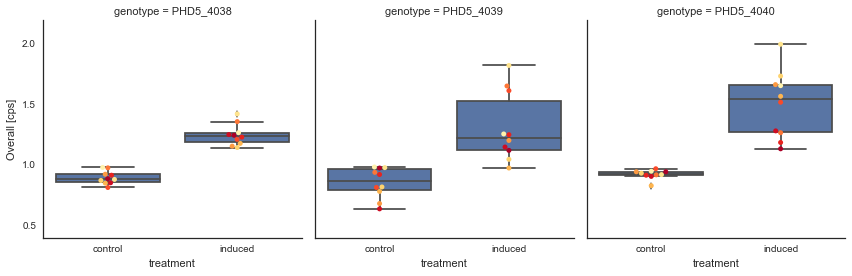

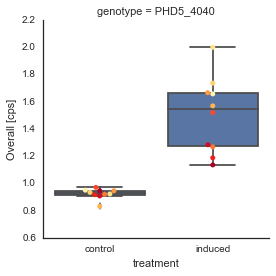

In [9]:
data = data_PHD5

#plotting data to figure out the best lines to transplant
# data=data[data['time']>90]
# g = seaborn.FacetGrid(data,aspect=2,size=4,col='genotype',row='area_label')
# g = seaborn.FacetGrid(data,aspect=2,size=4,col='genotype')
# g = g.map(seaborn.pointplot, 'time','Overall [cps]','treatment',palette='Blues').add_legend()

# #plotting normalized timecourses
normalization_observation_number =12
num_plant_lines = 30
num_time_points= 26
start_time = 90
end_time = 250
# x=plot_normalized_timecourses_faceted(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time)
# x=plot_normalized_timecourses(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time)

#Plotting boxplots
# y=plot_normalized_foldchange_boxplots_timecourses(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time)
y=plot_normalized_foldchange_boxplots(data,normalization_observation_number,num_plant_lines,num_time_points,190,190)
# plt.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170604_PHD5_Induction_Exp_All_Lines.svg')

#Plotting data for figure
data_fig = data_PHD5[data_PHD5['genotype']=='PHD5_4040']
num_plant_lines = 10
y=plot_normalized_foldchange_boxplots(data_fig,normalization_observation_number,num_plant_lines,num_time_points,190,190)
# plt.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170604_PHD5_Induction_Exp_Best_Line.svg')

anova = scipy.stats.f_oneway(data_fig[(data_fig['treatment']=='induced')]['Overall [cps]'],data_fig[(data_fig['treatment']=='control')]['Overall [cps]'])
print(anova)

C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


F_onewayResult(statistic=nan, pvalue=nan)
F_onewayResult(statistic=nan, pvalue=nan)

C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



F_onewayResult(statistic=89.490712963720213, pvalue=1.0724560383294179e-19)


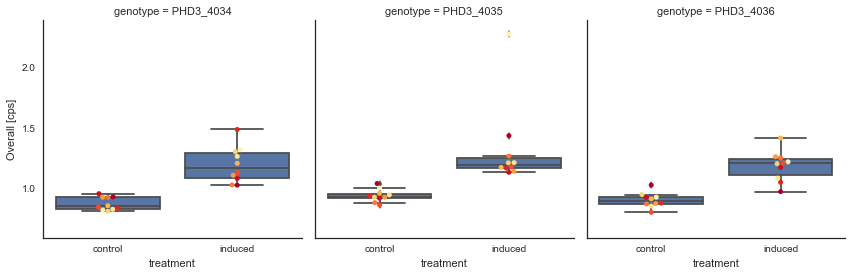

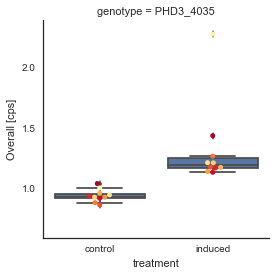

In [10]:
data = data_PHD3

#plotting data to figure out the best lines to transplant
# data=data[data['time']>90]
# g = seaborn.FacetGrid(data,aspect=2,size=4,col='genotype',row='area_label')
# g = g.map(seaborn.pointplot, 'time','Overall [cps]','treatment',palette='Blues').add_legend()

#plotting normalized timecourses
normalization_observation_number =12
num_plant_lines = 30
num_time_points= 26
start_time = 90
end_time = 250
# x=plot_normalized_timecourses(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time)

#Plotting boxplots
# y=plot_normalized_foldchange_boxplots_timecourses(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time)
y=plot_normalized_foldchange_boxplots(data,normalization_observation_number,num_plant_lines,num_time_points,190,190)

# plt.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170604_PHD3_Induction_Exp_All_Lines.svg')

#Plotting data for figure
data_fig = data_PHD3[data_PHD3['genotype']=='PHD3_4035']
num_plant_lines = 10
y=plot_normalized_foldchange_boxplots(data_fig,normalization_observation_number,num_plant_lines,num_time_points,190,190)
# plt.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170604_PHD3_Induction_Exp_Best_Line.svg')

anova = scipy.stats.f_oneway(data_fig[(data_fig['treatment']=='induced')]['Overall [cps]'],data_fig[(data_fig['treatment']=='control')]['Overall [cps]'])
print(anova)


C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


F_onewayResult(statistic=nan, pvalue=nan)
F_onewayResult(statistic=118.67762185623636, pvalue=5.0350515949999214e-25)


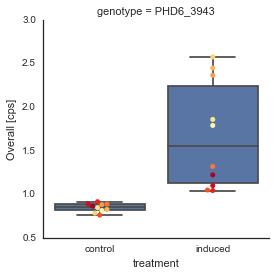

In [11]:
data = data_PHD6

#plotting data to figure out the best lines to transplant
# data=data[data['time']>90]
# g = seaborn.FacetGrid(data,aspect=2,size=4,col='genotype',row='area_label')
# g = g.map(seaborn.pointplot, 'time','Overall [cps]','treatment',palette='Blues').add_legend()

#plotting normalized timecourses
normalization_observation_number =12
num_plant_lines = 30
num_time_points= 26
start_time = 90
end_time = 250
# x=plot_normalized_timecourses(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time)

#Plotting boxplots
# y=plot_normalized_foldchange_boxplots_timecourses(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time)
# y=plot_normalized_foldchange_boxplots(data,normalization_observation_number,num_plant_lines,num_time_points,180,180)
# plt.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170604_PHD6_Induction_Exp_All_Lines.svg')

#Plotting data for figure
data_fig = data_PHD6[data_PHD6['genotype']=='PHD6_3943']
num_plant_lines = 10
y=plot_normalized_foldchange_boxplots(data_fig,normalization_observation_number,num_plant_lines,num_time_points,180,180)
# plt.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170604_PHD6_Induction_Exp_Best_Line.svg')
anova = scipy.stats.f_oneway(data_fig[(data_fig['treatment']=='induced')]['Overall [cps]'],data_fig[(data_fig['treatment']=='control')]['Overall [cps]'])
print(anova)

C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


F_onewayResult(statistic=nan, pvalue=nan)
F_onewayResult(statistic=58.748337491196786, pvalue=8.9007656814830203e-14)


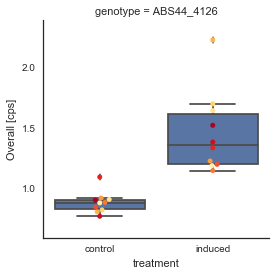

In [38]:
data = data_ABS44

#plotting data to figure out the best lines to transplant
# data=data[data['time']>90]
# g = seaborn.FacetGrid(data,aspect=2,size=4,col='genotype',row='area_label')
# g = g.map(seaborn.pointplot, 'time','Overall [cps]','treatment',palette='Blues').add_legend()

#plotting normalized timecourses
normalization_observation_number =12
num_plant_lines = 20
num_time_points= 26
start_time = 90
end_time = 250
# x=plot_normalized_timecourses(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time)

#Plotting boxplots
# y=plot_normalized_foldchange_boxplots_timecourses(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time)
num_plant_lines = 10
y=plot_normalized_foldchange_boxplots(data[data['genotype']=='ABS44_4126'],normalization_observation_number,num_plant_lines,num_time_points,180,180)
anova = scipy.stats.f_oneway(data[(data['genotype']=='ABS44_4126')&(data['treatment']=='induced')]['Overall [cps]'],data[(data['genotype']=='ABS44_4126')&(data['treatment']=='control')]['Overall [cps]'])
print(anova)
# y.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170603_Fig1_ABS44_4126_Boxplot.svg')



C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


F_onewayResult(statistic=nan, pvalue=nan)
F_onewayResult(statistic=172.4073932808449, pvalue=3.3609856792194646e-34)


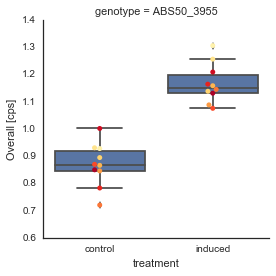

In [39]:
data = data_ABS50

#plotting data to figure out the best lines to transplant
# data=data[data['time']>90]
# g = seaborn.FacetGrid(data,aspect=2,size=4,col='genotype',row='area_label')
# g = g.map(seaborn.pointplot, 'time','Overall [cps]','treatment',palette='Blues').add_legend()

#plotting normalized timecourses
normalization_observation_number =12
num_plant_lines = 10
num_time_points= 26
start_time = 90
end_time = 250
# x=plot_normalized_timecourses(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time)

#Plotting boxplots
# y=plot_normalized_foldchange_boxplots_timecourses(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time)
y=plot_normalized_foldchange_boxplots(data,normalization_observation_number,num_plant_lines,num_time_points,180,180)
anova = scipy.stats.f_oneway(data[(data['treatment']=='induced')]['Overall [cps]'],data[(data['treatment']=='control')]['Overall [cps]'])
print(anova)
# y.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170603_Fig1_ABS50_3955_Boxplot.svg')


F_onewayResult(statistic=5.8558199298962466, pvalue=0.015868785654888445)


C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


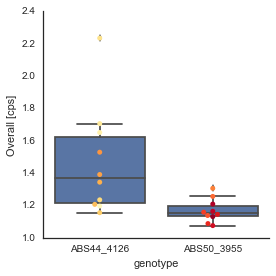

In [40]:
data = data_ABS[(data_ABS['genotype']=='ABS44_4126')|(data_ABS['genotype']=='ABS50_3955')]
anova = scipy.stats.f_oneway(data[(data['treatment']=='induced')&(data_ABS['genotype']=='ABS44_4126')]['Overall [cps]'],data[(data['treatment']=='induced')&(data_ABS['genotype']=='ABS50_3955')]['Overall [cps]'])
print(anova)


normalization_observation_number =12
num_plant_lines = 20
num_time_points= 26
start_time = 90
end_time = 250
x=plot_normalized_foldchange_boxplots_2(data,normalization_observation_number,num_plant_lines,num_time_points,180,180)
x.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170806_Fig1_ABS44_v_ABS50_induction_Boxplot.svg')



C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


F_onewayResult(statistic=31.991290063791944, pvalue=2.2965819406101064e-05)


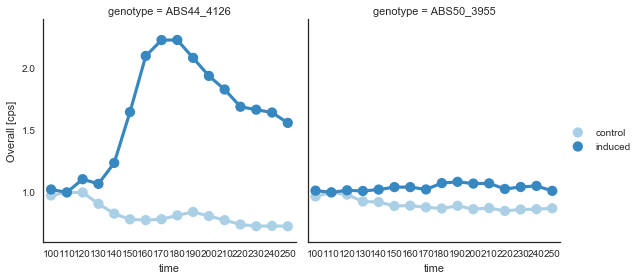

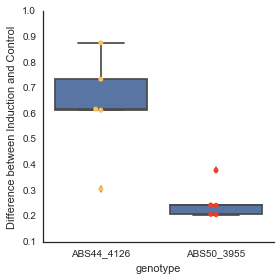

In [37]:
data_timecorse = data_ABS[(data_ABS['area_label']==44)|(data_ABS['area_label']==57)]
#plotting data to figure out the best lines to transplant
# data=data[data['time']>90]
# g = seaborn.FacetGrid(data,aspect=2,size=4,col='genotype',row='area_label')
# g = g.map(seaborn.pointplot, 'time','Overall [cps]','treatment',palette='Blues').add_legend()

#plotting normalized timecourses
normalization_observation_number =12
num_time_points= 26
start_time = 100
end_time = 250

#plotting preprisentitive timecourses for fig 1
num_plant_lines = 2
x=plot_normalized_timecourses(data_timecorse,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time)
# x.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170603_Fig1_ABS440and50_TimeCourse.svg')

#Plotting boxplots for fig 1
num_plant_lines = 10
# y=plot_normalized_foldchange_boxplots_timecourses(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time)
y=plot_normalized_foldchange_boxplots(data,normalization_observation_number,num_plant_lines,num_time_points,180,180)
# y.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170603_Fig1_ABS440and50_Boxplot.svg')


In [112]:
def find_time_to_max_foldchange(data,start_time,end_time,num_plant_lines):
    
    data = data[(data['time']>(start_time-1))&(data['time']<(end_time+1))]
    num_time_points = len(data)/num_plant_lines
    time_max_fold_change = [0]*num_plant_lines
    max_fold_change = [0]*num_plant_lines
    
    for counter1 in range(num_plant_lines):
        compare_to = data['Overall [cps]'].iloc[counter1]
        for counter2 in range(num_time_points):
            if data['Overall [cps]'].iloc[(num_plant_lines*counter2)+counter1] > compare_to:
                time_max_fold_change[counter1] = data['time'].iloc[(num_plant_lines*counter2)+counter1]
                max_fold_change[counter1] = float(data['Overall [cps]'].iloc[(num_plant_lines*counter2)+counter1])
                compare_to = data['Overall [cps]'].iloc[(num_plant_lines*counter2)+counter1]
    
    line_analysis = pandas.DataFrame({'genotype':data[data['time']==start_time]['genotype'],'line':data.area_label.unique(),'Time to Max Fold change':time_max_fold_change,'Max Fold change':max_fold_change,'treatment':['induced']*num_plant_lines})
    
    return line_analysis

In [113]:
def find_control_values_at_max_foldchange(data,line_analysis):
    
    control_fold_change = [0]*len(line_analysis)
    counter1=0
    for i in line_analysis['line']:
        time_max = int(line_analysis[line_analysis['line']==i]['Time to Max Fold change'])
        control_fold_change[counter1]= float(data[(data['time']==time_max)&(data['treatment']=='control')&(data['area_label']==i)]['Overall [cps]'])
    line_analysis_control = pandas.DataFrame({'genotype':data[(data['time']==110)&(data['treatment']=='control')]['genotype'],'line':data.area_label.unique(),'Time to Max Fold change':line_analysis['Time to Max Fold change'],'Max Fold change':control_fold_change,'treatment':['control']*len(line_analysis)})
    
    return line_analysis_control      

In [88]:
def plot_line_analysis(line_analysis):
    
    plt.figure()
    line_analysis['Max percent change post induction'] = [(x-1)*100 for x in line_analysis['Max Fold change']]
    seaborn.FacetGrid(data=line_analysis,size=5,aspect=3)
    g1 = seaborn.barplot(data=line_analysis,x='genotype',y='Max percent change post induction',palette='inferno').set_title('Max percent change post induction')
    plt.figure()
    seaborn.FacetGrid(data=line_analysis,size=5,aspect=3)
    g2 = seaborn.barplot(data=line_analysis,x='genotype',y='Time to Max Fold change',palette='inferno').set_title('Time to Max Change')
    

In [114]:
#Analysis of normalized timecourses:
ABS44_line_analysis = find_time_to_max_foldchange(data_ABS44[data_ABS44['treatment']=='induced'],110,240,20)
ABS50_line_analysis = find_time_to_max_foldchange(data_ABS50[data_ABS50['treatment']=='induced'],110,240,10)
PHD5_line_analysis = find_time_to_max_foldchange(data_PHD5[data_PHD5['treatment']=='induced'],110,240,30)
PHD3_line_analysis = find_time_to_max_foldchange(data_PHD3[data_PHD3['treatment']=='induced'],110,240,30)
PHD6_line_analysis = find_time_to_max_foldchange(data_PHD6[data_PHD6['treatment']=='induced'],110,240,30)

# ABS44_line_analysis_control = find_control_values_at_max_foldchange(data_ABS44,ABS44_line_analysis)
# ABS50_line_analysis_control = find_control_values_at_max_foldchange(data_ABS50,ABS50_line_analysis)
# PHD5_line_analysis_control = find_control_values_at_max_foldchange(data_PHD5,PHD5_line_analysis)
# PHD3_line_analysis_control = find_control_values_at_max_foldchange(data_PHD3,PHD3_line_analysis)
# PHD6_line_analysis_control = find_control_values_at_max_foldchange(data_PHD6,PHD6_line_analysis)




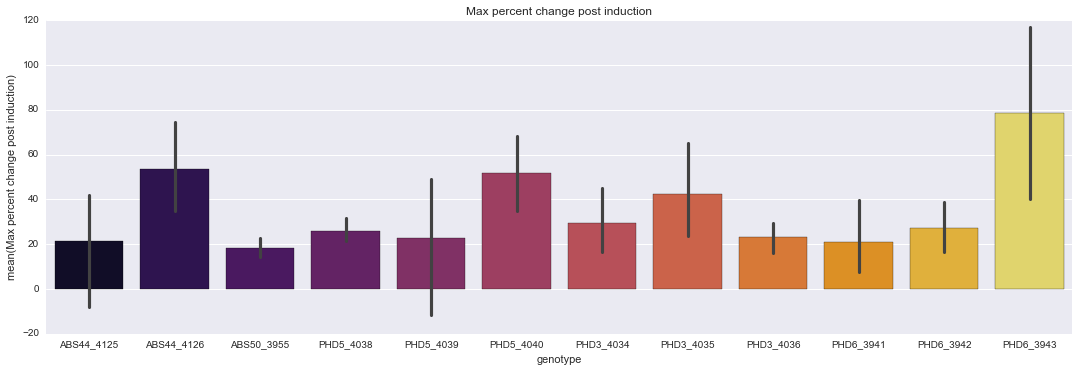

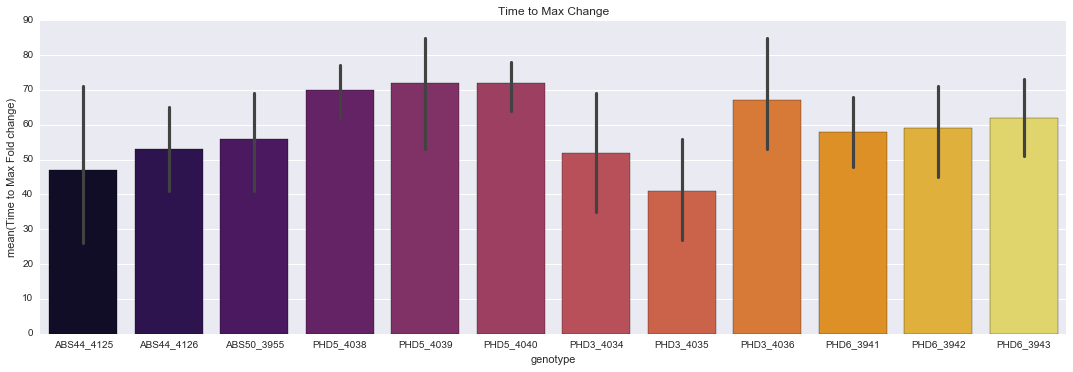

In [111]:
line_analysis = ABS44_line_analysis.append(ABS50_line_analysis).append(PHD5_line_analysis).append(PHD3_line_analysis).append(PHD6_line_analysis)
plot_line_analysis(line_analysis)


(0, 200)

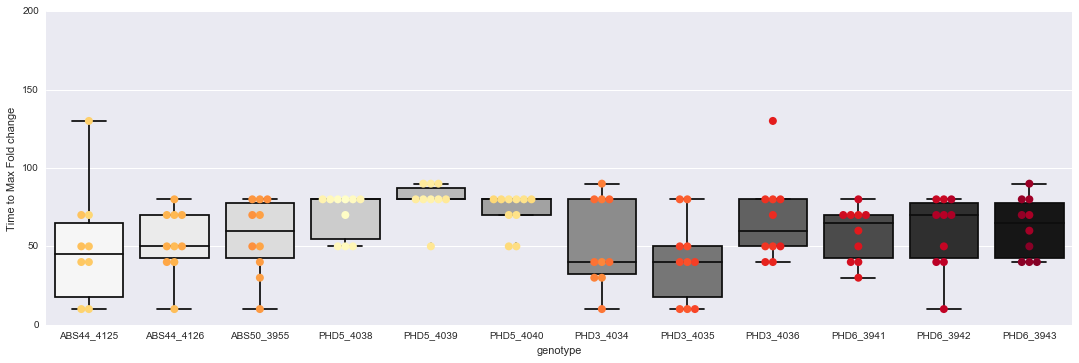

In [205]:
line_analysis = ABS44_line_analysis.append(ABS50_line_analysis).append(PHD5_line_analysis).append(PHD3_line_analysis).append(PHD6_line_analysis)
# line_analysis_control = ABS44_line_analysis_control.append(ABS50_line_analysis_control).append(PHD5_line_analysis_control).append(PHD3_line_analysis_control).append(PHD6_line_analysis_control)
# line_analysis = line_analysis_induced.append(line_analysis_control)

line_analysis['Time to Max Fold change'] = [(x-110) for x in line_analysis_induced['Time to Max Fold change']]

# fig = seaborn.factorplot(data=line_analysis,x='genotype',kind='box',y='Max Fold change',hue='treatment',aspect=3)

fig = seaborn.FacetGrid(data=line_analysis,size=5,aspect=3)
seaborn.boxplot(data=line_analysis, x='genotype',y='Time to Max Fold change',palette='Greys')
seaborn.swarmplot(data=line_analysis,x='genotype',y='Time to Max Fold change',hue='line',size=8,palette='YlOrRd').legend_.remove()
plt.ylim(0,200)

(0, 200)

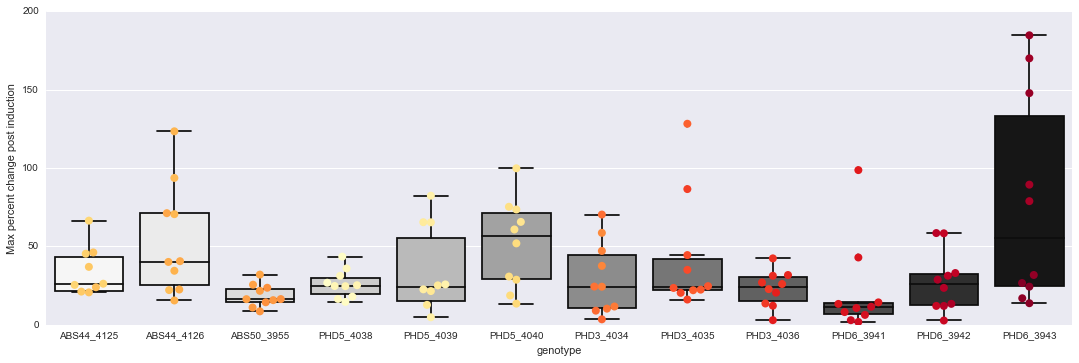

In [206]:
line_analysis = ABS44_line_analysis.append(ABS50_line_analysis).append(PHD5_line_analysis).append(PHD3_line_analysis).append(PHD6_line_analysis)
line_analysis['Max percent change post induction'] = [(x-1)*100 for x in line_analysis_induced['Max Fold change']]
fig = seaborn.FacetGrid(data=line_analysis,size=5,aspect=3)
seaborn.boxplot(data=line_analysis, x='genotype',y='Max percent change post induction',palette='Greys')
seaborn.swarmplot(data=line_analysis,x='genotype',y='Max percent change post induction',hue='line',size=8,palette='YlOrRd').legend_.remove()
plt.ylim(0,200)
